<a href="https://colab.research.google.com/github/shivanipoosala/BOOT_CAMP-AIML/blob/main/DAY10_SMS_SPAM_all_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/SMSSpamCollection',sep='\t',header=None,names=['label','message'])

In [3]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
#Data preprocessing

#method2
df['label']=df.label.map({'ham':0,'spam':1})

In [5]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Bag of words(BOW)-sklearn
#Define the documents
documents=['Hello,how are you!',
           'Win money,win from home.',
           'Call me now.',
           'Hello,Call hello you tomorrow?']

#Apply countvectorizer -import it from sklearn library
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer()


In [7]:
#fit_transform
count_vector.fit(documents)

CountVectorizer()

In [8]:
n=count_vector.get_feature_names()
print(n)

['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money', 'now', 'tomorrow', 'win', 'you']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
doc_array=count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [10]:
#converting this array into a dataframe -for understanding
freq_table=pd.DataFrame(data=doc_array,columns=n)


In [11]:
freq_table

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [12]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#load the data
#method 1
x=df.iloc[:,-1:].values #independent -message column
y=df.iloc[:,:-1].values #dependent-label column

#method2
'''
import numpy as np
x1=np.array(df[['message']])
y1=np.array(df[['label']])'''

'''#method 3
x=df[['message']]
y=df[['label']]'''

"#method 3\nx=df[['message']]\ny=df[['label']]"

In [14]:
x

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['Ok lar... Joking wif u oni...'],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['Pity, * was in mood for that. So...any other suggestions?'],
       ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['Rofl. Its true to its name']], dtype=object)

In [15]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [16]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [17]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [18]:
x_train.shape

(4457, 1)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())


In [20]:
training_data

<4457x7793 sparse matrix of type '<class 'numpy.int64'>'
	with 59049 stored elements in Compressed Sparse Row format>

In [21]:
testing_data

<1115x7793 sparse matrix of type '<class 'numpy.int64'>'
	with 14139 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [23]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [24]:
y_test=y_test.flatten()
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [25]:
y_pred=model.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [26]:
print('predicted training data',model.score(training_data,y_train))
print('predicted testing data',model.score(testing_data,y_test))


predicted training data 0.9932690150325331
predicted testing data 0.9874439461883409


In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[952   3]
 [ 11 149]]


0.9874439461883409

In [28]:
TN=952
FN=3
FP=11
TP=149
accuracy_naive=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_naive*100)

98.7443946188341


 #DECISION TREE

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())


In [30]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(training_data,y_train)

DecisionTreeClassifier()

In [31]:
y_test=y_test.flatten()
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [32]:
y_pred=tree.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [33]:
print('predicted training data',tree.score(training_data,y_train))
print('predicted testing data',tree.score(testing_data,y_test))

predicted training data 1.0
predicted testing data 0.9766816143497757


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[944  11]
 [ 15 145]]
Accuracy= 97.66816143497758


In [35]:
TN=943
FN=12
FP=18
TP=142
accuracy_decision=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_decision*100)

97.30941704035875


#LOGISTIC REGRESSION

In [36]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())

In [38]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(training_data,y_train)
print(model2)

LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
y_test=y_test.flatten()
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [40]:
y_pred=model2.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [41]:
print('predicted training data',model2.score(training_data,y_train))
print('predicted testing data',model2.score(testing_data,y_test))

predicted training data 0.9977563383441777
predicted testing data 0.9802690582959641


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[952   3]
 [ 19 141]]
Accuracy= 98.02690582959642


In [43]:
TN=952
FN=3
FP=19
TP=141
accuracy_logistic=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_logistic*100)

98.02690582959642


#RANDOM FOREST CLASSIFIER

In [44]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [47]:
y_test=y_test.flatten()
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [48]:
y_pred=forest.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [49]:
print('predicted training data',forest.score(training_data,y_train))
print('predicted testing data',forest.score(testing_data,y_test))

predicted training data 1.0
predicted testing data 0.97847533632287


In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[955   0]
 [ 24 136]]
Accuracy= 97.847533632287


In [51]:
TN=954
FN=1
FP=22
TP=138
accuracy_random=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_random* 100)

97.9372197309417


#KNeighbors Classifier

In [52]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [55]:
y_test=y_test.flatten()
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [56]:
y_pred=model1.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [57]:
print('predicted training data',model1.score(training_data,y_train))
print('predicted testing data',model1.score(testing_data,y_test))

predicted training data 0.9275297285169396
predicted testing data 0.9165919282511211


In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[955   0]
 [ 93  67]]
Accuracy= 91.65919282511211


In [59]:
TN=955
FN=0
FP=93
TP=67
accuracy_knn=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_knn*100)

91.65919282511211


#SVM

In [60]:
#split the data into training data and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True) 

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
#Transform the training data into freq vectors and return matrix
training_data=count_vector.fit_transform(x_train.flatten())

#Transform the testing data into freq vectors and return matrix
testing_data=count_vector.transform(x_test.flatten())

In [66]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(training_data,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [69]:
y_pred=svm.predict(testing_data)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [72]:
y_pred=svm.predict(testing_data)

np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [73]:
print('predicted training data',svm.score(training_data,y_train))
print('predicted testing data',svm.score(testing_data,y_test))

predicted training data 0.9966345075162666
predicted testing data 0.9829596412556054


In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy=",accuracy_score(y_test,y_pred)*100)

[[954   1]
 [ 18 142]]
Accuracy= 98.29596412556054


In [75]:
TN=954
FN=1
FP=18
TP=142
accuracy_svm=(TP+TN)/(TP+TN+FN+FP)
print(accuracy_svm*100)

98.29596412556054


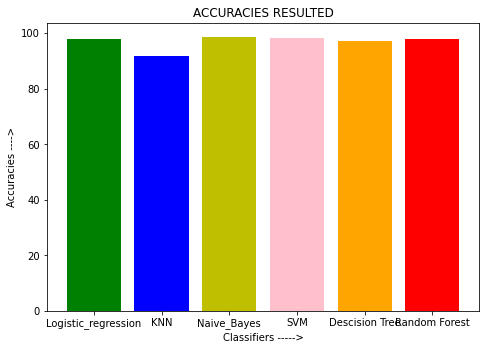

In [76]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['Logistic_regression','KNN','Naive_Bayes','SVM','Descision Tree','Random Forest']

accuracy = [accuracy_logistic*100,accuracy_knn*100,accuracy_naive*100,accuracy_svm*100,accuracy_decision*100,accuracy_random*100]

ax.bar(algo[0],accuracy[0],color = 'g')

ax.bar(algo[1],accuracy[1],color = 'b')

ax.bar(algo[2],accuracy[2],color = 'y')

ax.bar(algo[3],accuracy[3],color = 'pink')

ax.bar(algo[4],accuracy[4],color = 'orange')

ax.bar(algo[5],accuracy[5],color = 'r')



plt.xlabel('Classifiers ----->')

plt.ylabel('Accuracies ---->')

plt.title('ACCURACIES RESULTED')

plt.show()